<a href="https://colab.research.google.com/github/Keshav1506/Ted-Talks-views-Prediction-Model/blob/main/Ted_Talk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TED TALKS Views Prediction**
****
TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

##**Objective**
****
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

##**Importing Neccessary Libraries**

In [368]:
# Importing Neccessary Packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')


##**Data Gathering and Discovery**
***

In [369]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [370]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Capstone Project 2 - Ted Talk Views Prediction/"

# Importing TED Talks Data File.
Ted_talks = pd.read_csv(Data_path + "data_ted_talks.csv")

In [371]:
Ted_talks.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [372]:
Ted_talks.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [373]:
Ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [374]:
Ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

##**EDA on TED Talks Dataset**
***
Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. it’s a scientific approach to get the **story of the data**.

It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed. Also we'd deal with outliers in this section. However, in this project we've made a seperate section of feature engineering for variable transformations. 

Note:- For visualizations in EDA section we have used Tableau to create interactive and appealing charts rather than just some graphical representation of facts and data. 

In [375]:
%%HTML
<div class='tableauPlaceholder' id='viz1655992236730' style='position: relative'><noscript><a href='#'><img alt='Speakers and their respective Sum of views, duration and comments. ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA9&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Ted_talks_EDA9&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;Ted_talks_EDA9&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1655992236730');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='90%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Views** :-

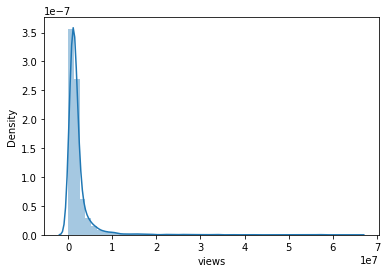

In [376]:
sns.distplot(Ted_talks["views"])

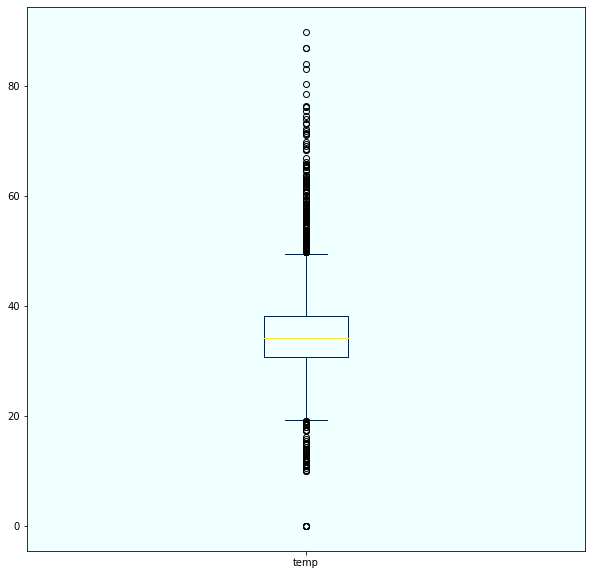

In [377]:
# Making a temporary column with Fourth root of 'views' column such that we can visualize it using a box plot.
Ted_talks["temp"] = np.power(Ted_talks["views"], 1/4)

# Plotting the Box plot on "temp" column.
Ted_talks.plot(y = "temp", kind = "box", figsize = (10,10), colormap = "cividis").patch.set_facecolor('#f0ffff')

# Dropping the 'temp' column since its irrelevant 
Ted_talks.drop(axis = 1, labels = ["temp"], inplace = True)

In [378]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

In [379]:
Ted_talks["all_speakers"].fillna(value = str({0:""}), axis = 0, inplace=True)

Dropping Rows with 0 Views

In [380]:
li = Ted_talks[Ted_talks["comments"]>1000].index
Ted_talks.drop(labels = li, axis = 0, inplace = True)

In [381]:
Ted_talks["comments"].fillna(Ted_talks["comments"].median(), axis = 0, inplace = True)

In [382]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)

##**Feature Engineering**
***

In [383]:
Ted_talks.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."


In [384]:
Ted_talks["all_speakers_count"] = Ted_talks["all_speakers"].apply(lambda x: len(eval(x)))

In [385]:
from datetime import datetime
import datetime as dt
Ted_talks['published_date'] = Ted_talks['published_date'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

Ted_talks['year'] = Ted_talks['published_date'].dt.year
Ted_talks['month'] = Ted_talks['published_date'].dt.month
Ted_talks['day'] = Ted_talks["published_date"].dt.day_name()

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
Ted_talks['daynum'] = Ted_talks['day'].map(daydict)

Ted_talks['weekdays_weekend']=Ted_talks['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Ted_talks=Ted_talks.drop(columns=['published_date'],axis=1)

In [386]:
Ted_talks["year_recency"] = 2021 - Ted_talks["year"]
Ted_talks["per_annum_views"] = Ted_talks["views"]//Ted_talks["year_recency"]

In [387]:
Ted_talks["native_lang"] = Ted_talks["native_lang"].apply(lambda x: 0 if x == "en" else 1)

In [388]:
Ted_talks["available_lang_count"] = Ted_talks["available_lang"].apply(lambda x: len(eval(x)))

In [389]:
Ted_talks["topics_covered"] = Ted_talks["topics"].apply(lambda x: len(eval(x)))

In [390]:
d = {}
for row in Ted_talks.index:
    list_of_topics = Ted_talks["topics"][row]
    list_of_topics = list_of_topics.strip('][').split(', ')
    
    for topic in list_of_topics:
        topic = topic[1:len(topic)-1]
        d[topic] = d.get(topic, 0) + 1

In [391]:
def weight_of_topic(x):
    x = eval(x)
    for i in range(len(x)):
        x[i] = d[str(x[i])]
    weight = sum(x)
    return weight

Ted_talks["topics_weight"] = Ted_talks["topics"].apply(lambda x: weight_of_topic(x))
    

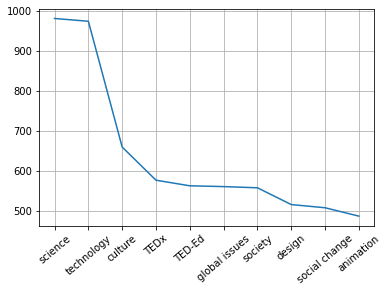

In [392]:

from operator import itemgetter
  
ddd = dict(sorted(d.items(), key = itemgetter(1), reverse = True)[:10])

myList = ddd.items()
# myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
plt.xticks(rotation = 40)
plt.grid()
plt.show()

In [393]:
Ted_talks['words_count_descp'] = Ted_talks['description'].str.split().apply(len)

In [394]:
Ted_talks.drop(axis = 1, labels = ["talk_id", "all_speakers", "title", "occupations", 
                                    "recorded_date", "about_speakers", 
                                   "related_talks", "url", 
                                   "transcript", "speaker_1", "event",  "available_lang",
                                  "topics", "description", "day", "month", "year"], inplace = True)

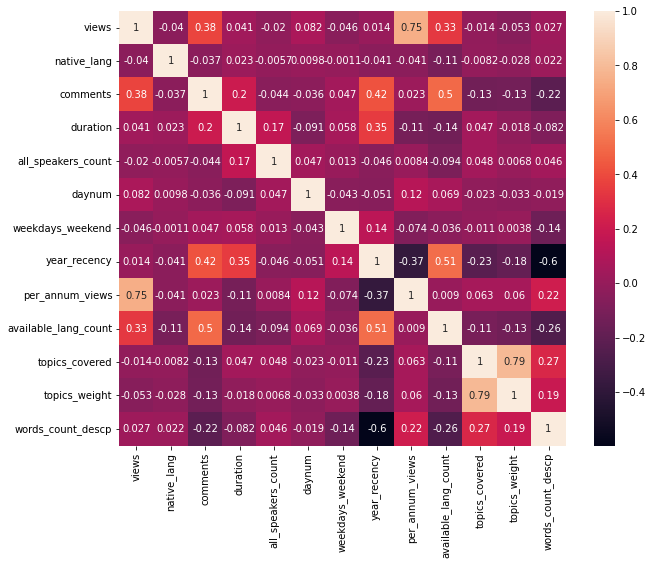

In [395]:
correlmap = Ted_talks.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

In [396]:
Ted_talks

,views,native_lang,comments,duration,all_speakers_count,daynum,weekdays_weekend,year_recency,per_annum_views,available_lang_count,topics_covered,topics_weight,words_count_descp
0,3523392,0,272.0,977,1,2,0,15,234892,43,9,3796,39
1,14501685,0,628.0,1190,1,2,0,15,966779,49,11,1840,26
2,1920832,0,124.0,1286,1,2,0,15,128055,26,9,1993,31
3,2664069,0,219.0,1116,1,2,0,15,177604,35,9,1611,31
5,1208138,0,48.0,1198,1,1,0,15,80542,19,5,1558,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,760969,0,37.0,941,2,5,0,1,760969,4,8,1930,81
4000,502934,0,6.0,690,1,1,0,1,502934,1,7,2173,97
4001,307187,0,88.0,346,1,1,0,1,307187,4,8,2356,77
4002,464414,0,9.0,774,1,2,0,1,464414,1,5,1325,75


# Splitting the Dataframe into train and test sets.

In [397]:
# Ted_talks

In [398]:
Ted_talks.drop("per_annum_views", inplace=True, axis =1)

In [399]:
Ted_talks

,views,native_lang,comments,duration,all_speakers_count,daynum,weekdays_weekend,year_recency,available_lang_count,topics_covered,topics_weight,words_count_descp
0,3523392,0,272.0,977,1,2,0,15,43,9,3796,39
1,14501685,0,628.0,1190,1,2,0,15,49,11,1840,26
2,1920832,0,124.0,1286,1,2,0,15,26,9,1993,31
3,2664069,0,219.0,1116,1,2,0,15,35,9,1611,31
5,1208138,0,48.0,1198,1,1,0,15,19,5,1558,32
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,760969,0,37.0,941,2,5,0,1,4,8,1930,81
4000,502934,0,6.0,690,1,1,0,1,1,7,2173,97
4001,307187,0,88.0,346,1,1,0,1,4,8,2356,77
4002,464414,0,9.0,774,1,2,0,1,1,5,1325,75


In [400]:
X = Ted_talks[list(Ted_talks.columns)[1:]] 
y = Ted_talks[["views"]]

In [401]:
X

,native_lang,comments,duration,all_speakers_count,daynum,weekdays_weekend,year_recency,available_lang_count,topics_covered,topics_weight,words_count_descp
0,0,272.0,977,1,2,0,15,43,9,3796,39
1,0,628.0,1190,1,2,0,15,49,11,1840,26
2,0,124.0,1286,1,2,0,15,26,9,1993,31
3,0,219.0,1116,1,2,0,15,35,9,1611,31
5,0,48.0,1198,1,1,0,15,19,5,1558,32
...,...,...,...,...,...,...,...,...,...,...,...
3999,0,37.0,941,2,5,0,1,4,8,1930,81
4000,0,6.0,690,1,1,0,1,1,7,2173,97
4001,0,88.0,346,1,1,0,1,4,8,2356,77
4002,0,9.0,774,1,2,0,1,1,5,1325,75


In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(2967, 11)
(990, 11)


# Linear Regression

In [403]:
dependent_variable = 'views'

In [404]:
independent_variables = list(set(Ted_talks.columns.tolist()) - {"per_annum_views","views"})

In [405]:
independent_variables

['words_count_descp',
 'daynum',
 'duration',
 'topics_weight',
 'comments',
 'weekdays_weekend',
 'topics_covered',
 'native_lang',
 'available_lang_count',
 'year_recency',
 'all_speakers_count']

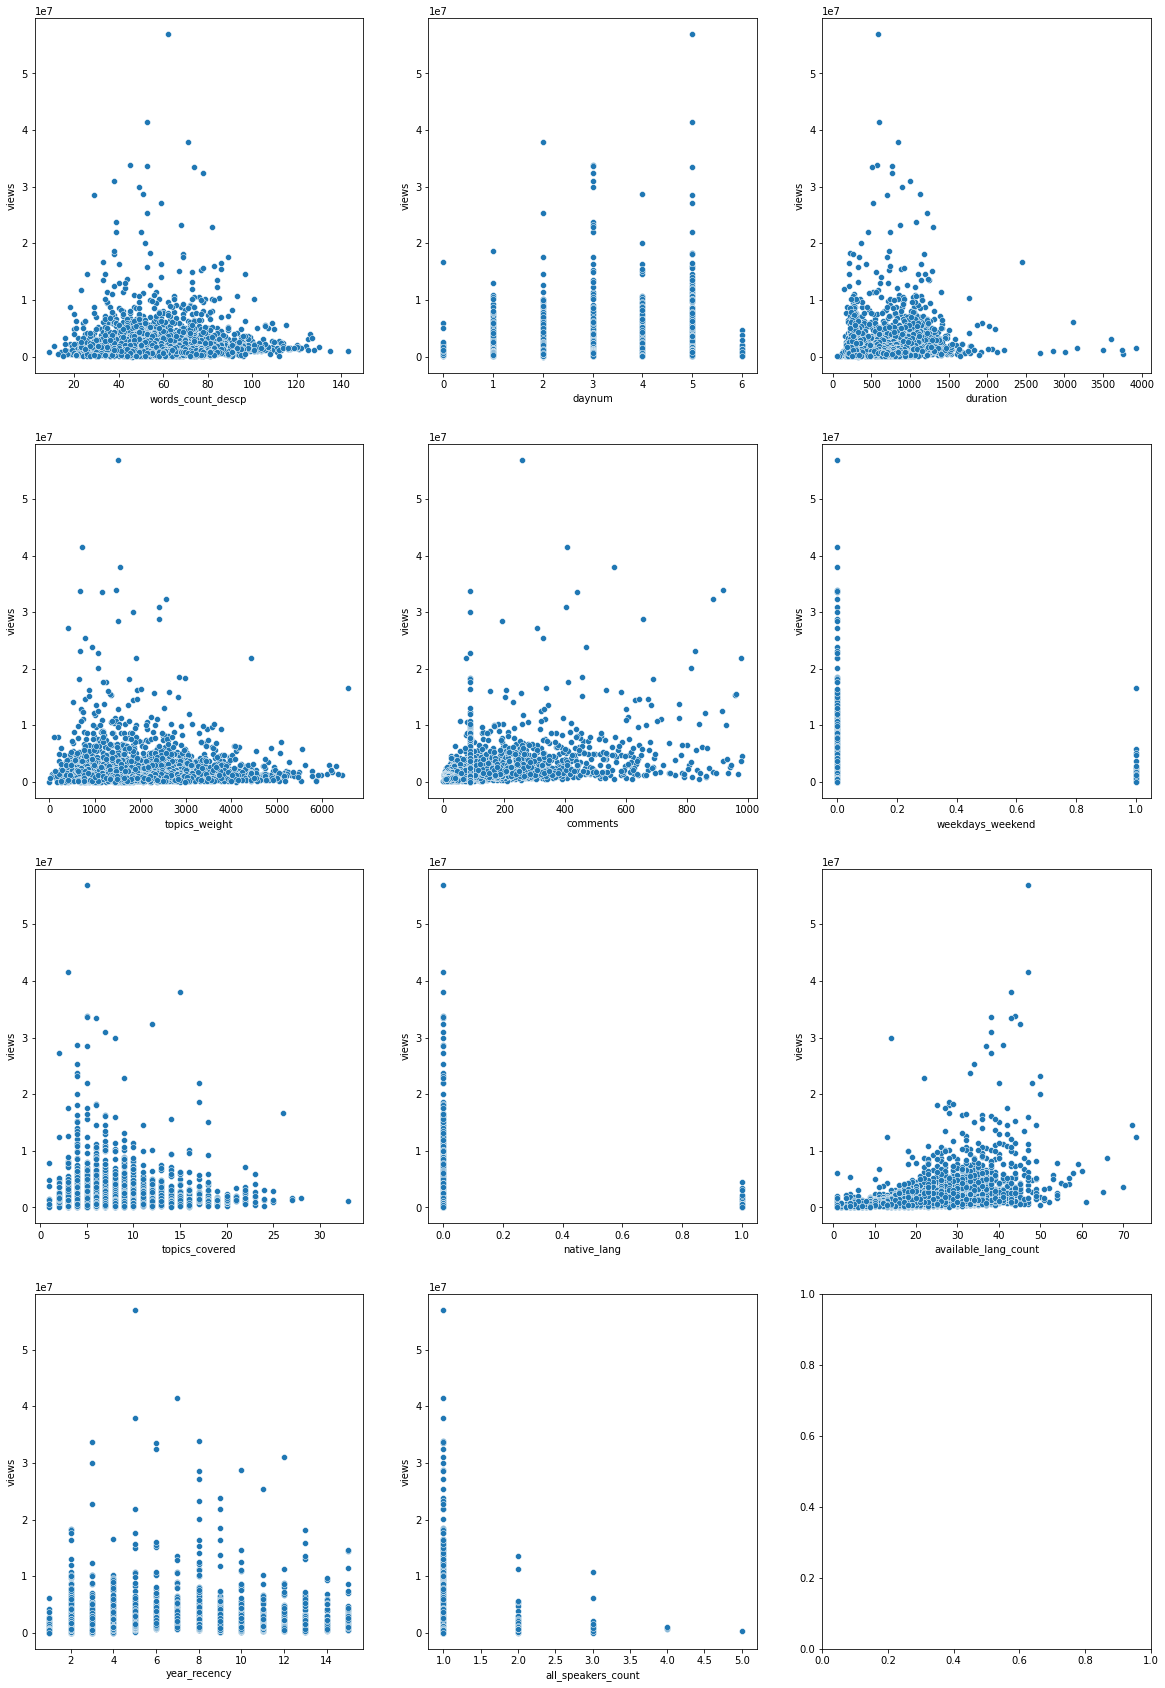

In [406]:
variable_df = Ted_talks[independent_variables]
fig, axes = plt.subplots(nrows = (variable_df.shape[1])//3 + (variable_df.shape[1]%4 != 0)*1, ncols=3, figsize= (20,30))
for i, col in enumerate(variable_df.columns):
  sns.scatterplot(data=Ted_talks, x=col, y="views", ax = axes[i//3, i%3])

In [407]:
# Create the data of independent variables
X = Ted_talks[independent_variables].values

# Create the dependent variable data
y = Ted_talks[dependent_variable].values

In [408]:
reg= LinearRegression().fit(X_train, y_train)

In [409]:
#check the score
reg.score(X_train, y_train)

0.2477302851246057

In [410]:
#check the coefficeint
reg.coef_

array([[-3.58807973e+05,  5.69291958e+03,  1.39777248e+03,
        -2.72802237e+05,  1.30206254e+05,  5.73985712e+04,
        -2.77976037e+05,  1.24728691e+05, -1.50239912e+04,
        -5.77624346e+01, -1.04744550e+03]])

In [411]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [412]:
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6024162468867.501
RMSE : 2454416.930529021
MAE : 1212806.953430062
R2 : 0.2477302851246057
Adjusted R2 : 0.23926917381210122


In [413]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [414]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,1212806.953,6.024162e+12,2454416.931,0.248,0.24


In [415]:
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 6672046975080.079
RMSE : 2583030.5795867145
MAE : 1180900.2101175075
R2 : 0.25618536689433213
Adjusted R2 : 0.24781935363854246


In [416]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

In [417]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,1180900.21,6.672047e+12,2583030.58,0.256,0.25


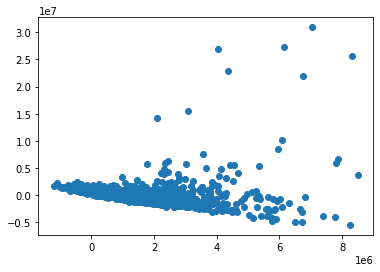

In [418]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

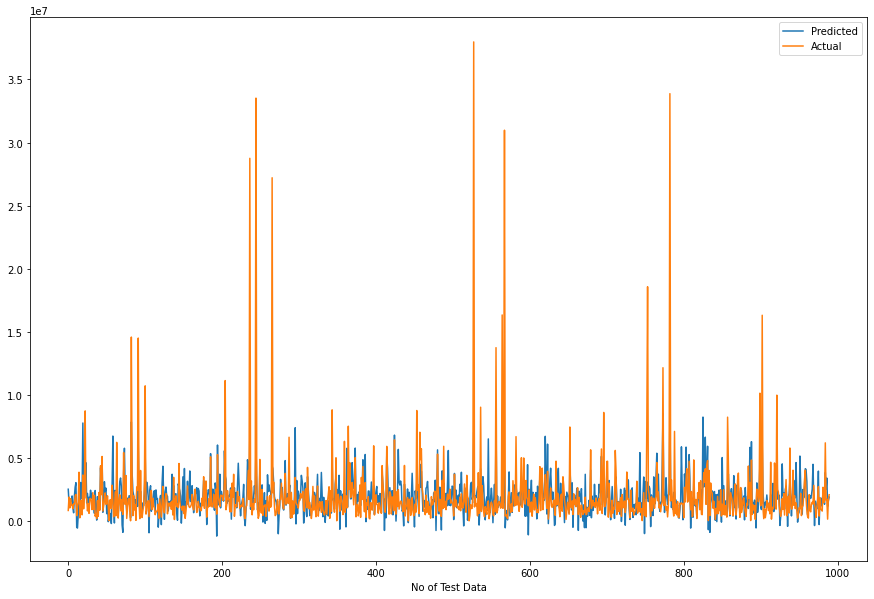

In [419]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# Lasso Regression

In [420]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.25618560105118526 0.24773028510480122


In [421]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [422]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 6024162469026.095
RMSE : 2454416.930561329
MAE : 1212806.3397972626
R2 : 0.24773028510480122
Adjusted R2 : 0.23926917379207402


In [423]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)

In [424]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1212806.953,6.024162e+12,2454416.931,0.248,0.24
1,Lasso regression,1212806.340,6.024162e+12,2454416.931,0.248,0.24


In [425]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6672044874683.752
RMSE : 2583030.1730107125
MAE : 1180899.2443341776
R2 : 0.25618560105118526
Adjusted R2 : 0.24781959042906154


In [426]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

In [427]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1180900.210,6.672047e+12,2583030.580,0.256,0.25
1,Lasso regression,1180899.244,6.672045e+12,2583030.173,0.256,0.25


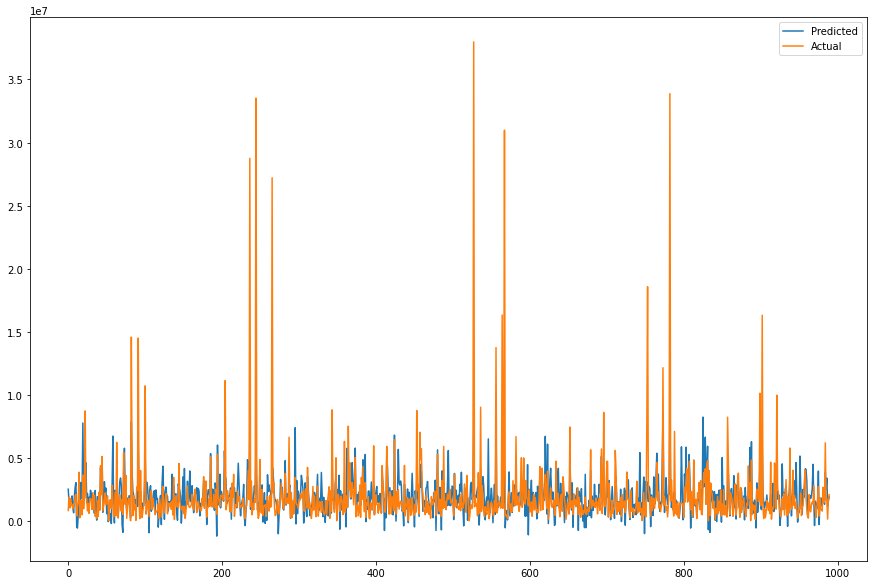

In [428]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [429]:
### Heteroscadacity
# plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso))

# Ridge Regression


In [430]:
ridge= Ridge(alpha=0.1)

In [431]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [432]:
#check the score
ridge.score(X_train, y_train)

0.24773028319409351

In [433]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [434]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6024162484327.009
RMSE : 2454416.933678345
MAE : 1212802.9548451644
R2 : 0.24773028319409351
Adjusted R2 : 0.23926917185987573


In [435]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [436]:
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6672031848859.976
RMSE : 2583027.6515864045
MAE : 1180893.0492687058
R2 : 0.2561870531989847
Adjusted R2 : 0.24782105890981176


In [437]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

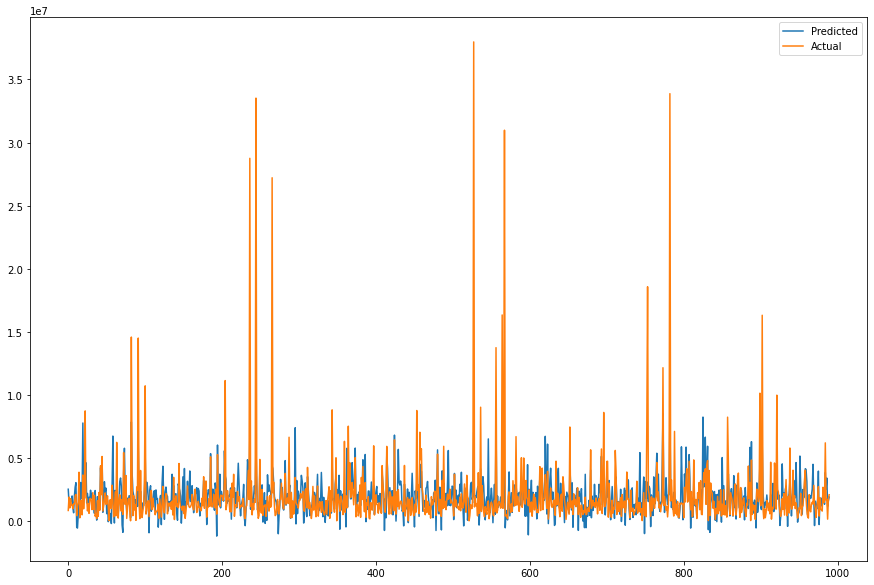

In [438]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

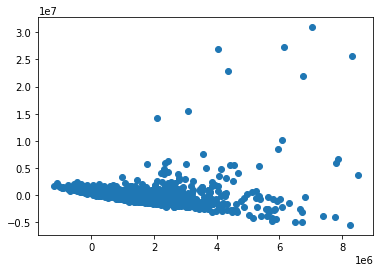

In [439]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# Elastic Net Regression

In [440]:
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [441]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [442]:
#check the score
elasticnet.score(X_train, y_train)

0.24748249180446447

In [443]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [444]:
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6026146793358.722
RMSE : 2454821.132660936
MAE : 1211108.3487990382
R2 : 0.24748249180446447
Adjusted R2 : 0.2390185934505269


In [445]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [446]:
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 6667953963953.251
RMSE : 2582238.1694865506
MAE : 1177369.0205638274
R2 : 0.25664166487619133
Adjusted R2 : 0.2482807838062916


In [447]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

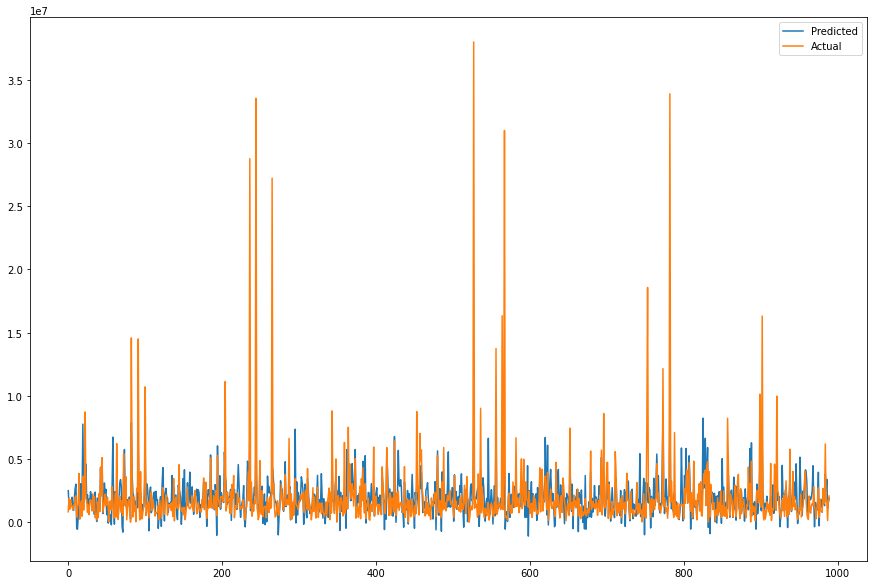

In [448]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [449]:
### Heteroscadacity
# plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

In [450]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1180900.210,6.672047e+12,2583030.580,0.256,0.25
1,Lasso regression,1180899.244,6.672045e+12,2583030.173,0.256,0.25
2,Ridge regression,1180893.049,6.672032e+12,2583027.652,0.256,0.25
3,Elastic net regression Test,1177369.021,6.667954e+12,2582238.169,0.257,0.25


In [451]:
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1212806.953,6.024162e+12,2454416.931,0.248,0.24
1,Lasso regression,1212806.340,6.024162e+12,2454416.931,0.248,0.24
2,Ridge regression,1212802.955,6.024162e+12,2454416.934,0.248,0.24
3,Elastic net regression,1211108.349,6.026147e+12,2454821.133,0.247,0.24


# Random Forest

In [452]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [453]:
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [454]:
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8991349304174286
MSE : 807725679478.7789
RMSE : 898735.600429169
MAE : 399434.9998685541
R2 : 0.8991349304174286
Adjusted R2 : 0.8980004562196696


In [455]:
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [456]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 5687124403289.687
RMSE : 2384769.2557750084
MAE : 1011715.4468383838
R2 : 0.3659867253245114
Adjusted R2 : 0.3588556966727421


In [457]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [458]:
rf_model.feature_importances_

array([0.00042255, 0.20277431, 0.14426136, 0.00366134, 0.03361283,
       0.00032765, 0.15909832, 0.20479208, 0.05688764, 0.09462664,
       0.09953529])

In [459]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [460]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [461]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,comments,0.20
7,available_lang_count,0.20
6,year_recency,0.16
2,duration,0.14
10,words_count_descp,0.10
9,topics_weight,0.09
8,topics_covered,0.06
4,daynum,0.03
0,native_lang,0.00
3,all_speakers_count,0.00


In [462]:
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,1180900.210,6.672047e+12,2583030.580,0.256,0.25
1,Lasso regression,1180899.244,6.672045e+12,2583030.173,0.256,0.25
2,Ridge regression,1180893.049,6.672032e+12,2583027.652,0.256,0.25
3,Elastic net regression Test,1177369.021,6.667954e+12,2582238.169,0.257,0.25
4,Random forest regression,1011715.447,5.687124e+12,2384769.256,0.366,0.36
